In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
import pandas as pd


file_path = '/content/drive/My Drive/beer_reviews.csv'


df = pd.read_csv(file_path)


df.head(10)


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
5,1075,Caldera Brewing Company,1325524659,3.0,3.5,3.5,oline73,Herbed / Spiced Beer,3.0,3.5,Caldera Ginger Beer,4.7,52159
6,1075,Caldera Brewing Company,1318991115,3.5,3.5,3.5,Reidrover,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
7,1075,Caldera Brewing Company,1306276018,3.0,2.5,3.5,alpinebryant,Herbed / Spiced Beer,2.0,3.5,Caldera Ginger Beer,4.7,52159
8,1075,Caldera Brewing Company,1290454503,4.0,3.0,3.5,LordAdmNelson,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159
9,1075,Caldera Brewing Company,1285632924,4.5,3.5,5.0,augustgarage,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159


In [4]:
df.isnull().sum()


,0
brewery_id,0
brewery_name,15
review_time,0
review_overall,0
review_aroma,0
review_appearance,0
review_profilename,348
beer_style,0
review_palate,0
review_taste,0


In [6]:
df.dtypes

,0
brewery_id,int64
brewery_name,object
review_time,int64
review_overall,float64
review_aroma,float64
review_appearance,float64
review_profilename,object
beer_style,object
review_palate,float64
review_taste,float64


In [12]:
max_abv_per_brewery = df.groupby('brewery_name')['beer_abv'].max()
strongest_breweries = max_abv_per_brewery.sort_values(ascending=False)
strongest_breweries.head(1)

,beer_abv
brewery_name,
Schorschbräu,57.7


Brewery that produced a beer with the highest ABV

In [47]:
df['average_review'] = (df['review_overall'] + df['review_aroma'] + df['review_palate'] + df['review_taste'] + df['review_appearance']) / 5.0

# Group by brewery_name, beer_name, beer_style and calculate review count and average review
grouped_df = df.groupby(['brewery_name', 'beer_name', 'beer_style']).agg(
    review_count=('beer_beerid', 'count'),
    average_review=('average_review', 'mean')
).reset_index()

# Filter beers with an average review greater than 4.5
filtered_df = grouped_df[grouped_df['average_review'] > 4.5]

# Sort by review_count (descending) and average_review (descending), then get the top 3
result_df = filtered_df.sort_values(by=['review_count', 'average_review'], ascending=[False, False]).head(3)

# Display the result in a table format
print(result_df.to_string(index=False))

                                              brewery_name                beer_name                       beer_style  review_count  average_review
                             Russian River Brewing Company          Pliny The Elder   American Double / Imperial IPA          2527        4.534626
                                         Deschutes Brewery                The Abyss American Double / Imperial Stout          1412        4.517776
Brouwerij Westvleteren (Sint-Sixtusabdij van Westvleteren) Trappist Westvleteren 12                 Quadrupel (Quad)          1272        4.601415


To recommend a beer I found the highest review on average and highest review count

The  factors that impacts the quality of the beer the most includes taste, palate, Aroma in that order

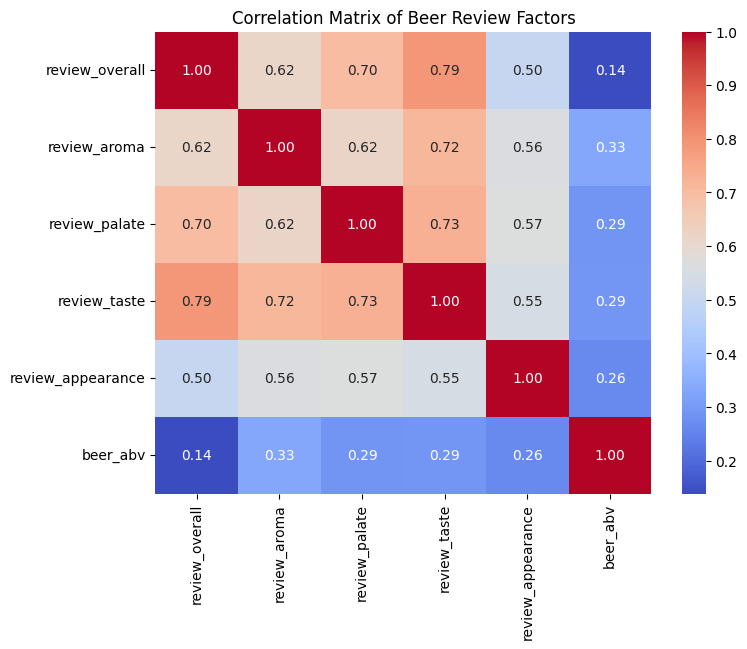

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df[['review_overall', 'review_aroma', 'review_palate', 'review_taste', 'review_appearance', 'beer_abv']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Beer Review Factors')
plt.show()


In [49]:

grouped = df.groupby(['brewery_name', 'beer_name', 'beer_style'])


aggregated = grouped.agg(
    max_review_appearance=pd.NamedAgg(column='review_appearance', aggfunc='max'),
    max_review_aroma=pd.NamedAgg(column='review_aroma', aggfunc='max'),
    max_review_overall=pd.NamedAgg(column='review_overall', aggfunc='max'),
    review_count=pd.NamedAgg(column='beer_beerid', aggfunc='count'),
    reviewers=pd.NamedAgg(column='review_profilename', aggfunc='nunique')
)


aggregated = aggregated.reset_index()


sorted_df = aggregated.sort_values(
    by=['review_count', 'max_review_overall', 'max_review_appearance', 'max_review_aroma'],
    ascending=[False, False, False, False]
)


top_beer = sorted_df.head(1)

print(top_beer.to_string(index=False))

        brewery_name     beer_name                     beer_style  max_review_appearance  max_review_aroma  max_review_overall  review_count  reviewers
Dogfish Head Brewery 90 Minute IPA American Double / Imperial IPA                    5.0               5.0                 5.0          3290       3206


To recommend a beer based off of correlation between aroma appearance and style I Checked for the beer with the highest number of reviewers, highest number of reviews and the total, aroma, and appearance review that matched each other.